**Задание**:
Необходимо загрузить данные опросов с сайта stackoverflow за 2020 или 2019 год (https://insights.stackoverflow.com/survey) и провести исследование данных по аналогии с работой на занятии.

Загрузка данных в данной работе происходит новым для меня образом. Выбрала данные за 2020 год. В данном случае данные загружаются в сессионное хранилище колаба

In [ ]:
!wget https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2020.zip
!unzip stack-overflow-developer-survey-2020.zip

--2022-10-06 14:10:47--  https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2020.zip
Resolving info.stackoverflowsolutions.com (info.stackoverflowsolutions.com)... 104.17.70.206, 104.17.73.206, 104.17.74.206, ...
Connecting to info.stackoverflowsolutions.com (info.stackoverflowsolutions.com)|104.17.70.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9908290 (9.4M) [application/zip]
Saving to: ‘stack-overflow-developer-survey-2020.zip’

stack-overflow-deve 100%[===================>]   9.45M  1.15MB/s    in 8.3s    

2022-10-06 14:10:56 (1.13 MB/s) - ‘stack-overflow-developer-survey-2020.zip’ saved [9908290/9908290]

Archive:  stack-overflow-developer-survey-2020.zip
  inflating: README_2020.txt         
  inflating: so_survey_2020.pdf      
  inflating: survey_results_public.csv  
  inflating: survey_results_schema.csv  


Импорт всех необходимых библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [ ]:
survay_results_df = pd.read_csv('/content/survey_results_public.csv')

В сравнении вс 2021 годом, который мы рассматривали на практике, в 2020 год людей, прошедших опрос меньше на 20 тысяч

In [ ]:
survay_results_df.shape #размер выборки

(64461, 61)

Просматр имеющихся колонкок (их больше, чем в 2021 году. Возможно, раработчики в последующем сделали опрос более стандартным и убрали какие-то не несущие положительную информацию поля. Например, это поле хобби)

Для того, чтобы понять, какие колонки рассматривать, необходимо просмотреть их значение. Для этого необходим файл с описанием вопроса каждой колонки

In [ ]:
survay_results_schema = pd.read_csv('/content/survey_results_schema.csv')
survay_results_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


С помощью данной команды происходит вывод описания каждого столбца. Так я отбирала столбцы, которые можно проанализировать

In [ ]:
survay_results_schema[survay_results_schema['Column'] == 'NEWEdImpt'].QuestionText.values

array(['How important is a formal education, such as a university degree in computer science, to your career?'],
      dtype=object)

In [ ]:
survay_results_df.info()#просмотр всех столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

Просматривая колонку 'MainBranch' можно увидеть 5 вариантов ответов

In [ ]:
survay_results_df['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

Посмотрев на график станет понятнее, что людей, которые занимаются профессионально разработкой намного больше, чем остальных

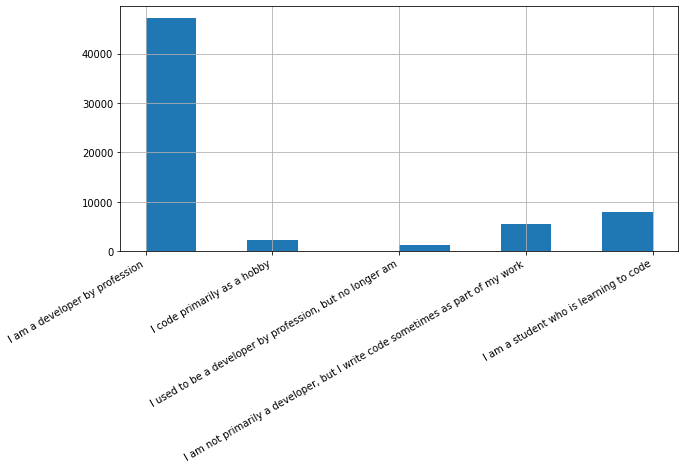

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
survay_results_df['MainBranch'].hist()
fig.autofmt_xdate() #авто перенос текста, если места не будет хватать

Также больше половины опрошенных считают кодинг своим хобби. Это говорит оо том, что их хобби связано с работой, что является качественным показателем их работы и жизни в целом. Они занимаются тем, что им нравится

In [ ]:
survay_results_df['Hobbyist'].value_counts()

Yes    50388
No     14028
Name: Hobbyist, dtype: int64

Минимальный и максимальный возраст говорят о том, что даннные в выборке имеют выбросы в виде некорректных данных

In [ ]:
print('Минимальный возраст: ', survay_results_df['Age'].min())
print('Максимальный возраст: ', survay_results_df['Age'].max())

Минимальный возраст:  1.0
Максимальный возраст:  279.0


удаляю данные, которые не подходят под критерии возраста от 10 до 99 лет

In [ ]:
survay_results_df.drop(survay_results_df[survay_results_df['Age']<10].index, inplace=True)
survay_results_df.drop(survay_results_df[survay_results_df['Age']>99].index, inplace=True)

In [ ]:
print('Минимальный возраст: ', survay_results_df['Age'].min())
print('Максимальный возраст: ', survay_results_df['Age'].max())

Минимальный возраст:  10.0
Максимальный возраст:  99.0


На графике видно, что большая часть людей сконцентрирована от 20 до 40 лет

count    45436.000000
mean        30.834294
std          9.506982
min         10.000000
25%         24.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64
------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


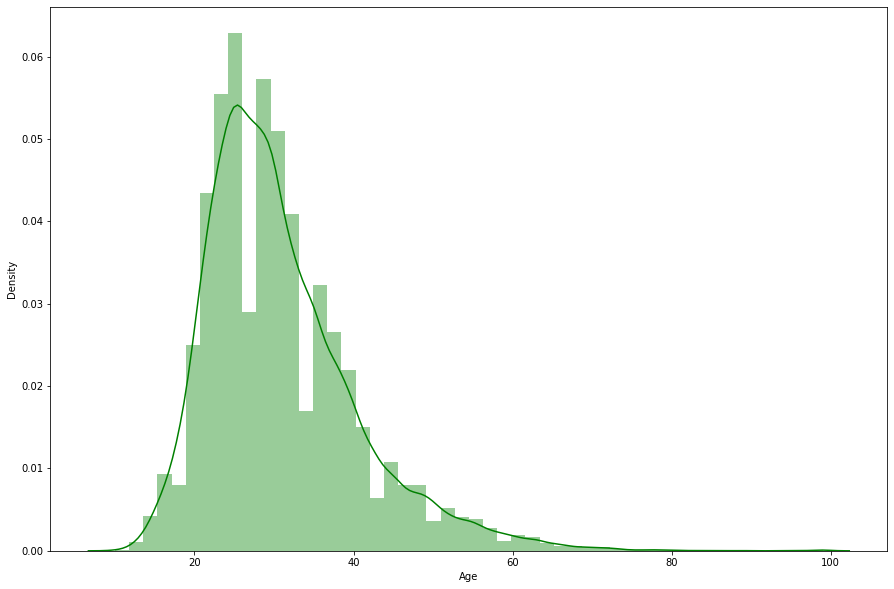

In [ ]:
print(survay_results_df['Age'].describe())
print('------------')
plt.figure(figsize=(15, 10))
sns.distplot(survay_results_df['Age'], color='g', hist_kws={'alpha': 0.4});

Для наглядности разделяю возраст на категории

In [ ]:
age_labels_4 = ['меньше 18', 'от 18 до 24', 'от 25 до 34', 'от 35 до 44', 'от 45 до 54', 'от 55 до 64', 'старше 65']
age_bins = [0, 17, 24, 34, 44, 54, 64, survay_results_df['Age'].max()]

In [ ]:
#создание нового столбца категории и разбиение возраста по критериям
survay_results_df['Age_cut'] = pd.cut(survay_results_df['Age'], bins=age_bins, labels=age_labels_4)
survay_results_df['Age_cut'].value_counts()#вывод категорий

от 25 до 34    20866
от 18 до 24    10670
от 35 до 44     8674
от 45 до 54     2807
меньше 18       1191
от 55 до 64      957
старше 65        271
Name: Age_cut, dtype: int64

С помощью графика видно, что, действительно, большое количество людей, занимающихся разработкой, находятся в диапазоне от 25 до 34 лет. После них, ровно в половину, меньше людей от 18 до 24 лет. Можно заметить, что в выборке присутствуют люди старше 65 лет, что не может не удивлять

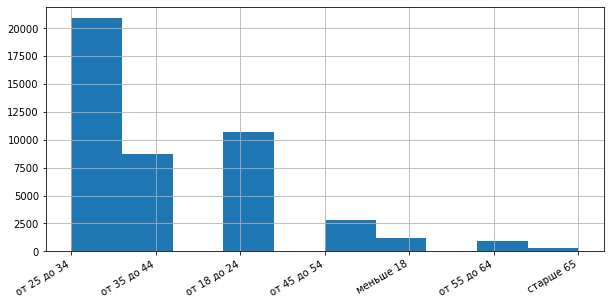

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
survay_results_df['Age_cut'].hist()
fig.autofmt_xdate()

Дальше стоит рассмотреть столбец "Age1stCode", который отвечает за то, восколько лет была написана первая строчка кода. Данный столбец необходимо привести в числовойй формат

In [ ]:
survay_results_df['Age1stCode'] = pd.to_numeric(survay_results_df['Age1stCode'],errors='coerce')

Также, как и возраст, вывожу максимальное и минимальное значение. Удивительно, что кто-то написал свой первый код в 5 лет, а кто-то в 85 лет. Хотя, возможно, это всего лишь шутка

In [ ]:
print('Минимальный возраст: ', survay_results_df['Age1stCode'].min())
print('Максимальный возраст: ', survay_results_df['Age1stCode'].max())

Минимальный возраст:  5.0
Максимальный возраст:  85.0


Поступаю аналогичным образом, как и с столбцом "Age" - делю на бины

In [ ]:
age_labels_4 = ['меньше 10', 'от 11 до 17', 'от 18 до 24', 'от 25 до 34', 'от 35 до 44', 'от 45 до 54', 'от 55 до 64', 'старше 65']
age_bins = [0,10, 17, 24, 34, 44, 54, 64, survay_results_df['Age1stCode'].max()]

Из 271 человека, старше 65 лет, 10 человек в этом возрасте написали свой первый код. В свою очередь, большинство людей писали свой первый код в возрасте от 11 до 17 лет.Больше всего удивляют люди, писавшие код в довольно-таки большом возрасте (старше 55 - 24 человека написали свой первый код)

In [ ]:
#создание нового столбца категории и разбиение возраста по критериям
survay_results_df['Age1stCode_cut'] = pd.cut(survay_results_df['Age1stCode'], bins=age_bins, labels=age_labels_4)
survay_results_df['Age1stCode_cut'].value_counts()#вывод категорий

от 11 до 17    32191
от 18 до 24    14460
меньше 10       8191
от 25 до 34     2219
от 35 до 44      298
от 45 до 54       84
от 55 до 64       14
старше 65         10
Name: Age1stCode_cut, dtype: int64

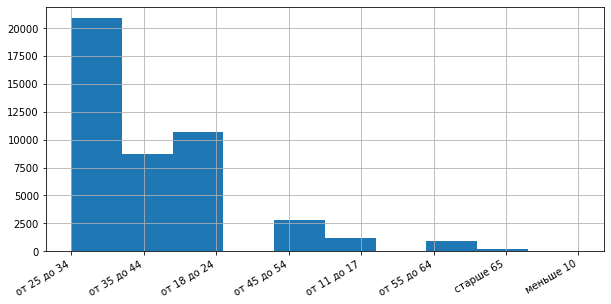

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
survay_results_df['Age1stCode_cut'].hist()
fig.autofmt_xdate()

Дальше просматриваю колонки "CompFreq" (в какой период происходит оплта) и "ConvertedComp" (оплата в долларах за выбранный период)

In [ ]:
survay_results_df['CompFreq'].value_counts() #ежегодно, ежемесячно и еженедельно

Yearly     19816
Monthly    18896
Weekly      1352
Name: CompFreq, dtype: int64

Хочу сравнить показатели времени и суммы за это время. Есть гипотеза, что люди, измеряющие свою оплату за неделю, получают больше, чем люди, измеряющие оплату за месяц, что может говорить об уровне знаний и престижности данного разработчика.

In [ ]:
survay_results_df['ConvertedComp'].where(survay_results_df['CompFreq']=='Monthly').describe()

count    1.467700e+04
mean     9.330800e+04
std      2.391496e+05
min      0.000000e+00
25%      1.237200e+04
50%      2.760000e+04
75%      5.188800e+04
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [ ]:
survay_results_df['ConvertedComp'].where(survay_results_df['CompFreq']=='Weekly').describe()

count    9.690000e+02
mean     5.769759e+05
std      7.976540e+05
min      0.000000e+00
25%      3.510000e+04
50%      1.082500e+05
75%      1.000000e+06
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Дальше рассматриваю показатель страны. Выводя первый 10 стран по популярности, можно увидеть, что основная масса разработчиков из США, и чуть меньше - из Индии

In [ ]:
survay_results_df['Country'].value_counts().head(10)

United States     12468
India              8401
United Kingdom     3896
Germany            3890
Canada             2191
France             1898
Brazil             1818
Netherlands        1341
Poland             1278
Australia          1208
Name: Country, dtype: int64

Аналогично коду из тетрадки по практике, вывод годовой оплаты по первым 10 наиболее популярным странам. Самый большой доход имеют люди из США, а вот самый маленький - из Бразилии

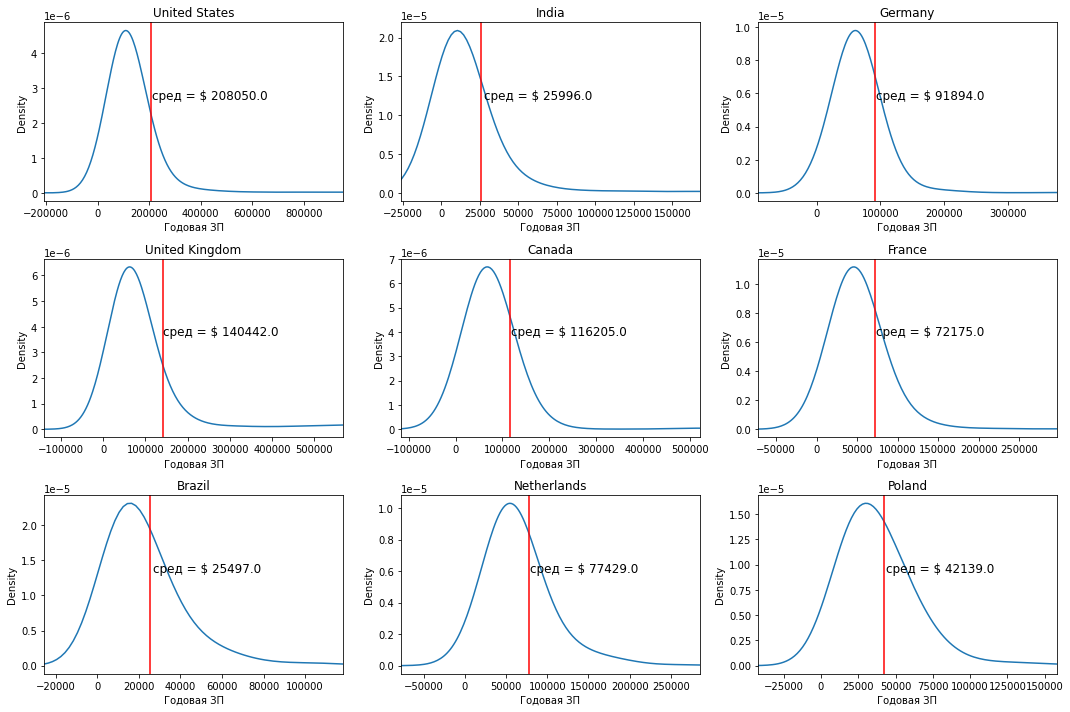

In [ ]:
fig = plt.figure(figsize=(15,10))

countries = survay_results_df['Country'].value_counts().sort_values(ascending=False)[:9].index.tolist()

for i,country in enumerate(countries):
    plt.subplot(3,3,i+1)
    temp_salaries = survay_results_df.loc[survay_results_df['Country']==country,'ConvertedComp']

    ax = temp_salaries.plot(kind='kde')
    ax.axvline(temp_salaries.mean(), linestyle = '-', color = 'red')
    ax.text((temp_salaries.mean() + 1500), (float(ax.get_ylim()[1])*0.55), 'сред = $ ' + str(round(temp_salaries.mean(),0)), fontsize = 12)
    ax.set_xlabel('Годовая ЗП')
    ax.set_xlim(-temp_salaries.mean(),temp_salaries.mean()+2*temp_salaries.std())

    ax.set_title(country)

plt.tight_layout()
plt.show()

В столбце гендера есть поля, которые не так важны, потому что они составляют малую часть оот общей массы. А для обзора стоит рассмотреть только мужской и женский пол

In [ ]:
survay_results_df['Gender'].value_counts()

Man                                                            46007
Woman                                                           3843
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         74
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

Удаляю из данных всё, что не относится к мужскому и женскому полу

In [ ]:
survay_results_df.drop(survay_results_df[~survay_results_df['Gender'].isin(['Man', 'Woman'])].index, inplace=True)

Мужчины составляют почти 93 процента из всего количества людей, а женщины всего 7.7% (что больше, чем в 2021 году)

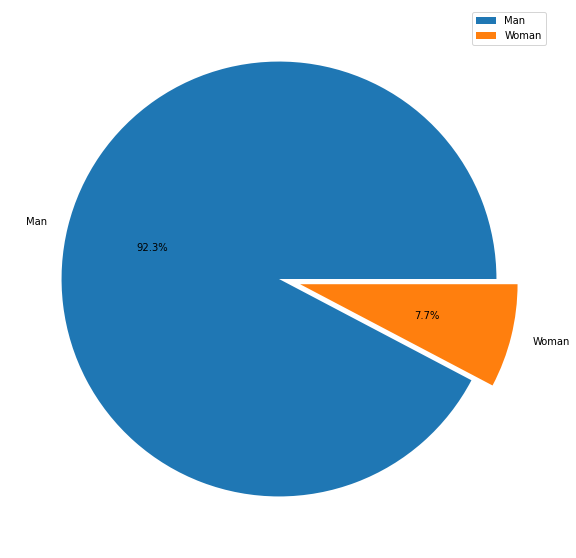

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,10))
ax1.pie(survay_results_df['Gender'].value_counts(),labels=survay_results_df['Gender'].value_counts().index,explode=(0,0.1),autopct="%1.1f%%")
ax1.legend(labels=survay_results_df['Gender'].value_counts().index,loc='upper right')
plt.show()

Если рассмотреть пол и возраст, то после 65 лет в IT попадают в основном мужчины, как и в возрасте меньше 18. Очень маленький процент в возрасте от 55 до 64. И наибольший от 25 до 34

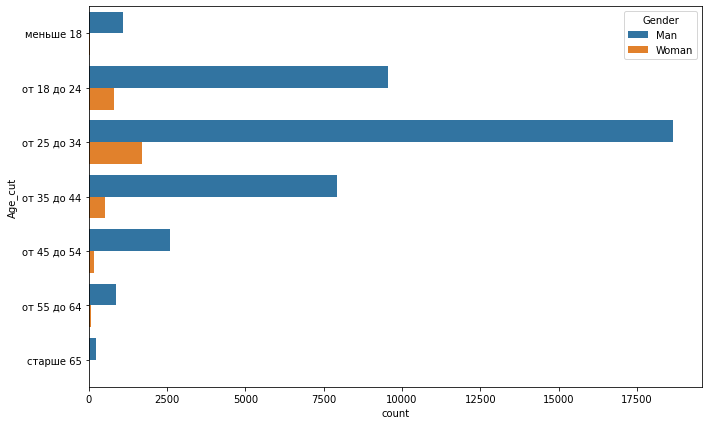

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(y=survay_results_df['Age_cut'],hue=survay_results_df['Gender'])
plt.show()

Больше 20 тысяч человек имеют образование уровня бакалавра, после них идет уровень магистратуры

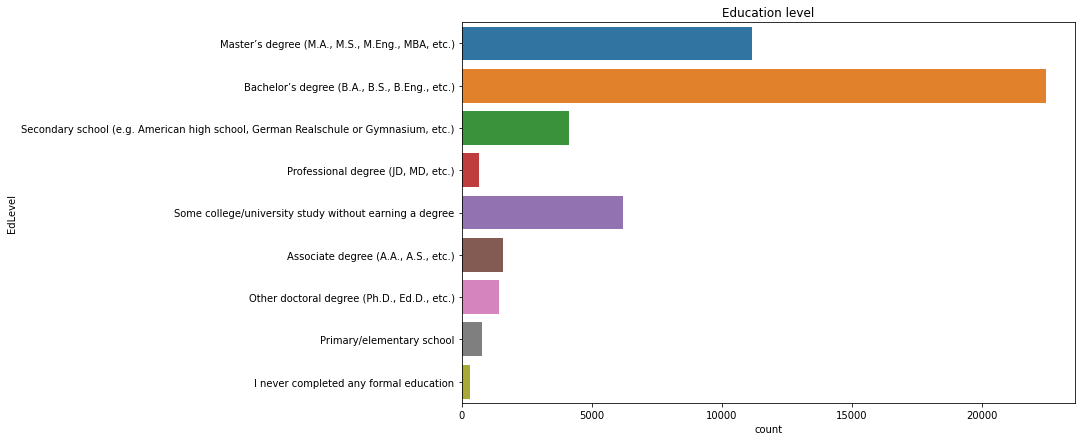

In [ ]:
plt.figure(figsize=(11,7))
plt.title("Education level")
sns.countplot(y=survay_results_df['EdLevel'])
plt.show()

In [ ]:
survay_results_df['EdLevel'].where(survay_results_df['Age_cut']=='старше 65').value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          70
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       70
Some college/university study without earning a degree                                41
Other doctoral degree (Ph.D., Ed.D., etc.)                                            27
Professional degree (JD, MD, etc.)                                                    12
Associate degree (A.A., A.S., etc.)                                                   11
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5
I never completed any formal education                                                 2
Name: EdLevel, dtype: int64

Следующий график иллюстрирует, что пол никак не повлиял на пропорцию: магистры и бакалавры также наибольшие уровни образования. Единственное - в пункте "Professional degree" нет ни одной женщины

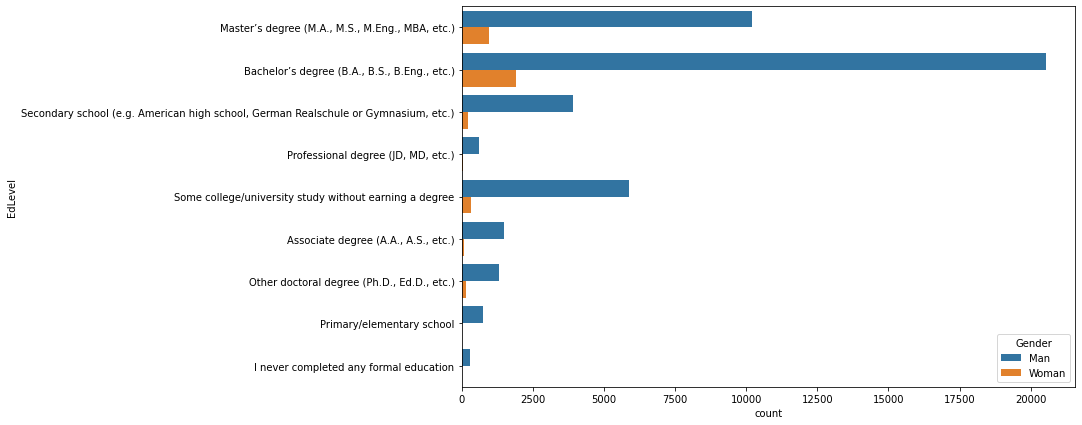

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(y=survay_results_df['EdLevel'],hue=survay_results_df['Gender'])
plt.show()

In [ ]:
#survay_results_df.drop(['Respondent', 'Ethnicity','CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'JobSeek','NEWCollabToolsDesireNextYear',  'NEWCollabToolsWorkedWith', 'NEWDevOps','NEWDevOpsImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn','NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWPurchaseResearch','NEWPurpleLink','NEWSOSites', 'OrgSize','PlatformDesireNextYear','PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq',  'SurveyLength', 'Trans','WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange'], axis=1, inplace=True)

Для простоты я удалила некоторые столбцы, которые не буду рассматривать

In [ ]:
survay_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49850 entries, 0 to 64446
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   MainBranch              49734 non-null  object  
 1   Hobbyist                49850 non-null  object  
 2   Age                     44242 non-null  float64 
 3   Age1stCode              49295 non-null  float64 
 4   CompFreq                35724 non-null  object  
 5   CompTotal               31770 non-null  float64 
 6   ConvertedComp           31708 non-null  float64 
 7   Country                 49850 non-null  object  
 8   CurrencyDesc            39376 non-null  object  
 9   DevType                 42588 non-null  object  
 10  EdLevel                 48744 non-null  object  
 11  Employment              49666 non-null  object  
 12  Gender                  49850 non-null  object  
 13  JobFactors              45392 non-null  object  
 14  JobSat                

С помощью методов, продемонтрированных на практике, объявляю метод для извлечения уникальных значений (в опроснике перечисления собирались в одну строку, которую необходимо разбить на уникальные значения и проссумировать)

In [ ]:
job_factors = survay_results_df[survay_results_df['JobFactors'].notnull()]
unique_job_factors = {}
for job_factors_set in job_factors['JobFactors'].apply(lambda row: str(row).split(';')):
    for job in job_factors_set:
        if job not in unique_job_factors.keys():
            unique_job_factors[job] = 1
        else:
            unique_job_factors[job] += 1

In [ ]:
unique_job_factors = { key:unique_job_factors[key] / survay_results_df['JobFactors'].count() * 100 for key in unique_job_factors}

In [ ]:
unique_job_factors

{'Languages, frameworks, and other technologies I’d be working with': 51.95849488896722,
 'Remote work options': 33.48387381036306,
 'Opportunities for professional development': 41.507314064152276,
 'Flex time or a flexible schedule': 44.21483961931617,
 'Office environment or company culture': 44.79864293267536,
 'Diversity of the company or organization': 6.4262425096933375,
 'Family friendliness': 12.072611913993656,
 'How widely used or impactful my work output would be': 20.91778286922806,
 'Industry that I’d be working in': 15.220743743390905,
 'Financial performance or funding status of the company or organization': 11.845699682763483,
 'Specific department or team I’d be working on': 11.764187522030314}

In [ ]:
list(unique_job_factors.keys())

['Languages, frameworks, and other technologies I’d be working with',
 'Remote work options',
 'Opportunities for professional development',
 'Flex time or a flexible schedule',
 'Office environment or company culture',
 'Diversity of the company or organization',
 'Family friendliness',
 'How widely used or impactful my work output would be',
 'Industry that I’d be working in',
 'Financial performance or funding status of the company or organization',
 'Specific department or team I’d be working on']

График показывает, какие факторы влияют на людей больше всего при выборе работы и что для сотрудников важно. Так, больше всего респондентам необходимо использование технологий и языков, с которыми они уже работали или работают. На втором месте важна корпоративная культура и офисная среда.

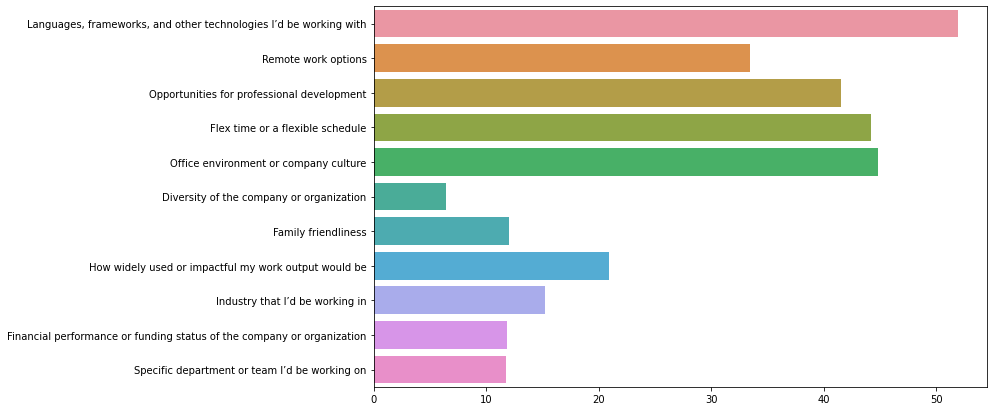

In [ ]:
plt.figure(figsize=(11,7))
sns.barplot(y=list(unique_job_factors.keys()),x=list(unique_job_factors.values()))
plt.show()

Если рассмотреть отношение людей, к своей работе, то больше половины людей ей довольны

In [ ]:
survay_results_df['JobSat'].value_counts()

Very satisfied                        12760
Slightly satisfied                    12156
Slightly dissatisfied                  6285
Neither satisfied nor dissatisfied     4866
Very dissatisfied                      3170
Name: JobSat, dtype: int64

В целом, людей, работающих "full-time" и удовлетворенных своей работой, в разы больше, чем всех остальных

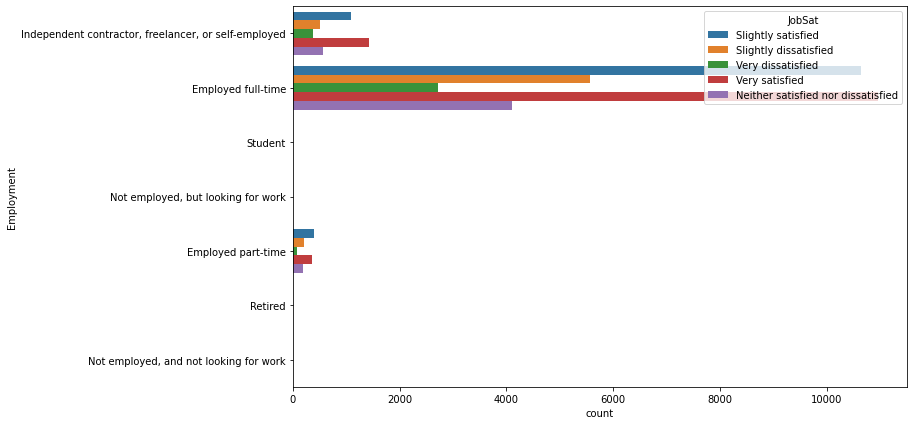

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(y=survay_results_df['Employment'],hue=survay_results_df['JobSat'])
plt.show()

Если же сравнить отношение к работе по возрасту, то можно заметить, что люди, старше 65 всегда довольны,

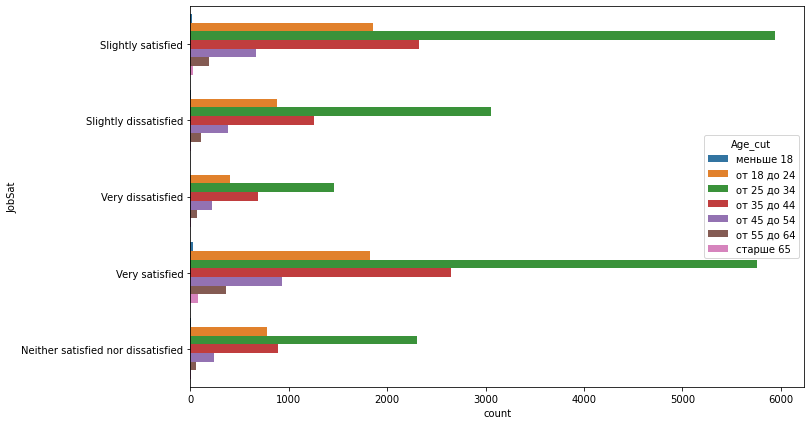

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(y=survay_results_df['JobSat'],hue=survay_results_df['Age_cut'])
plt.show()

In [ ]:
languages = survay_results_df[survay_results_df['LanguageWorkedWith'].notnull()]
unique_languages = {}
for language_set in languages['LanguageWorkedWith'].apply(lambda row: str(row).split(';')):
    for language in language_set:
        if language not in unique_languages.keys():
            unique_languages[language] = 1
        else:
            unique_languages[language] += 1

In [ ]:
def plot_dimension_count(unique_dim_dict, plot_title):
    dim_count = pd.DataFrame.from_dict(unique_dim_dict, orient='index', dtype=None)
    dim_count.columns = ['Count']
    dim_count.sort_values('Count',ascending=True,inplace=True)
    dim_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = plot_title);

Анализируя графики популярности ЯП за 2020 и 2021 года, можно отметить, что Python поднялся на позицию выше, C# спустился ниже. В целом, популярность языков, связанных с веб-разработкой всегда была объяснима, а особенно в период ковида

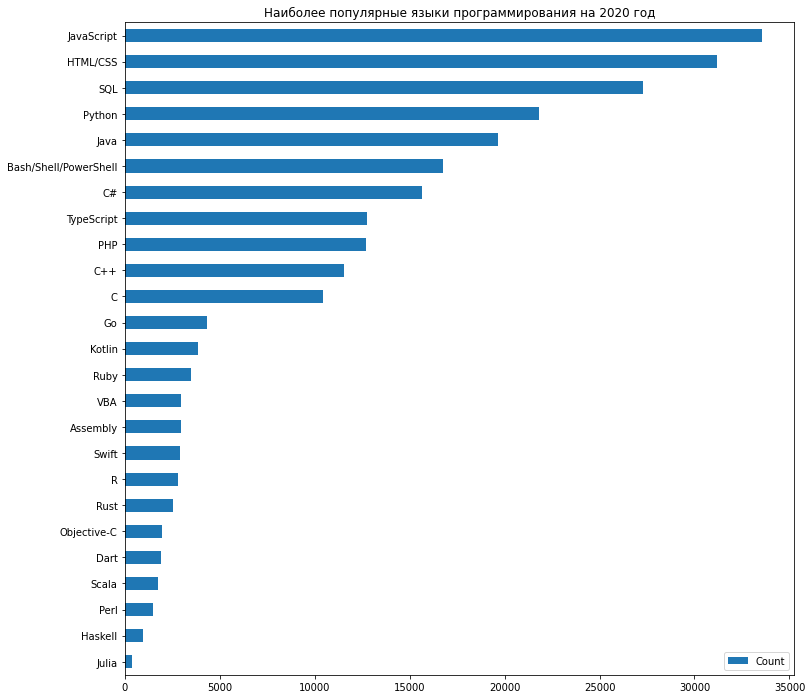

In [ ]:
plot_dimension_count(unique_languages,'Наиболее популярные языки программирования на 2020 год')

Дальше стоит рассмотреть специализацию разработчиков

In [ ]:
developers = survay_results_df[survay_results_df['DevType'].notnull()] # drop null values
unique_developers = {}
for developer_set in developers['DevType'].apply(lambda row: str(row).split(';')):
    for developer in developer_set:
        if developer not in unique_developers.keys():
            unique_developers[developer] = 1
        else:
            unique_developers[developer] += 1

В 2021 году full-stack разработчики стали наиболее востребованы, поэтому их количество увеличилось по сравнению с 2020 годом, где они были на равне с back-end разработчиками

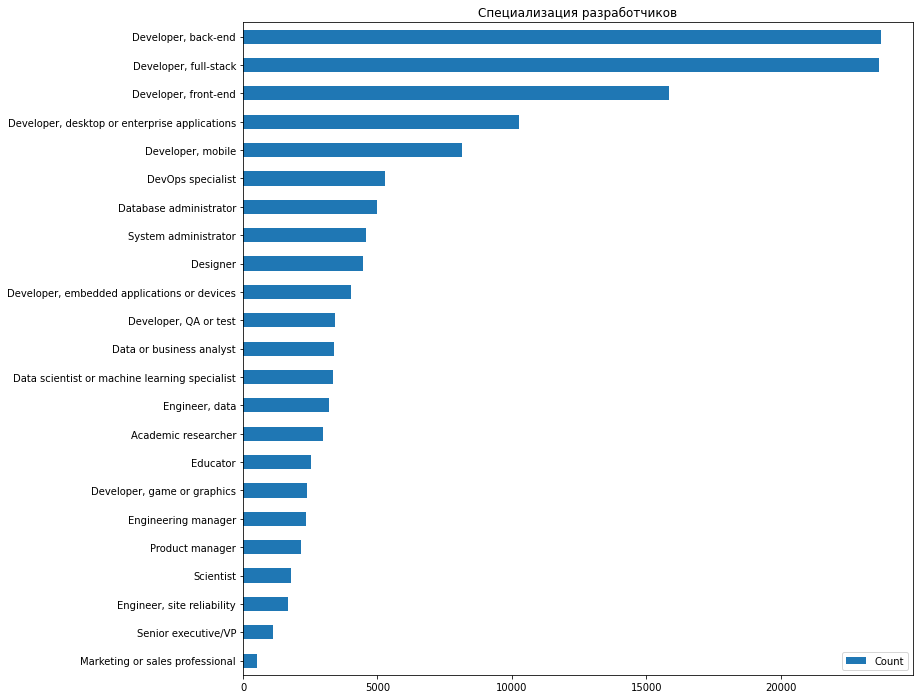

In [ ]:
plot_dimension_count(unique_developers,'Специализация разработчиков')

Меня заинтересовал столбец "NEWStuck", отвечающий за действие, которое предпринимает человек, при столкновении с проблемой во время написания кода

In [ ]:
stuks = survay_results_df[survay_results_df['NEWStuck'].notnull()]
unique_stuks = {}
for stuks_set in stuks['NEWStuck'].apply(lambda row: str(row).split(';')):
    for stuck in stuks_set:
        if stuck not in unique_stuks.keys():
            unique_stuks[stuck] = 1
        else:
            unique_stuks[stuck] += 1

Так, как и ожидалось, большинство респондентов обращаются за помощью к Stack Overflow

In [ ]:
def plot_dimension_count(unique_dim_dict, plot_title):
    dim_count = pd.DataFrame.from_dict(unique_dim_dict, orient='index', dtype=None)
    dim_count.columns = ['Count']
    dim_count.sort_values('Count',ascending=True,inplace=True)
    dim_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = plot_title);

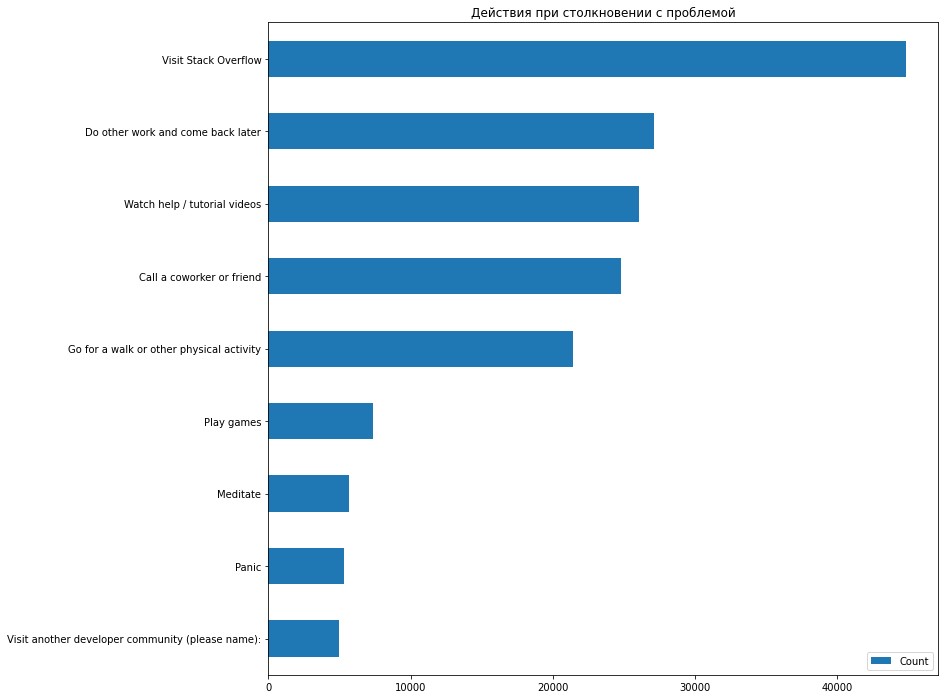

In [ ]:
plot_dimension_count(unique_stuks,'Действия при столкновении с проблемой')

Также с помощью графика можно рассмотреть образование, которое люди имели при вхождении в область IT. В основном это математические и инженерные направления

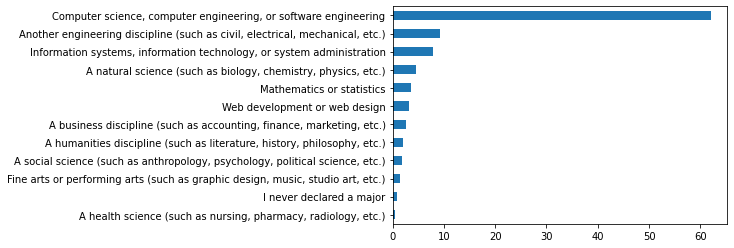

In [ ]:
(survay_results_df['UndergradMajor'].value_counts(normalize=True,ascending=True)*100).plot(kind='barh')

Следующий график иллюстрирует соотношение мужчин и женщин при переработке

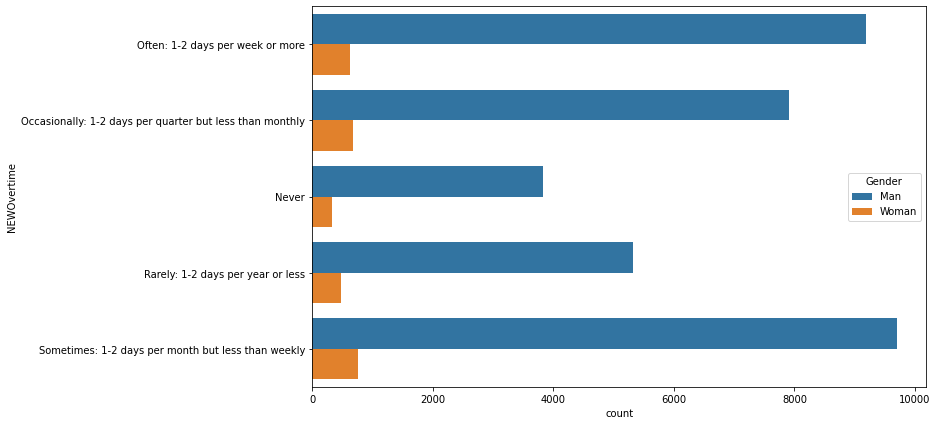

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(y=survay_results_df['NEWOvertime'],hue=survay_results_df['Gender'])
plt.show()

График показывает отношение к образованию мужчин и женщин. Как и предыдущий график, данные не отличаются особой информативностью. В целом и те и другие считают, что образование важно

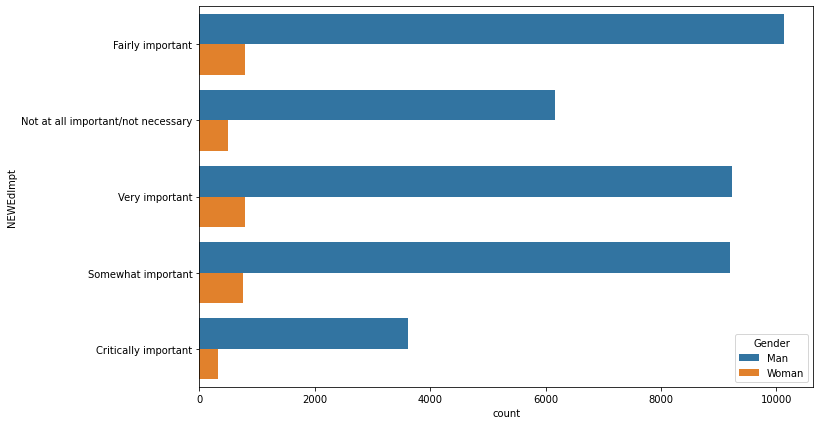

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(y=survay_results_df['NEWEdImpt'],hue=survay_results_df['Gender'])
plt.show()

В заключении хотелось бы рассмотреть отношение к образованию людей, которые имеют разный уровень образования. Люди, окончившие магистратуру, считают, что очень важно иметь образование. Бакалавры в большинстве своём отвечают, что образование довольно важно. респонденты, окончившие среднюю школу и колледж, считают, что оно не важно. Критически важно образование для людей, имеющих докторскую степень

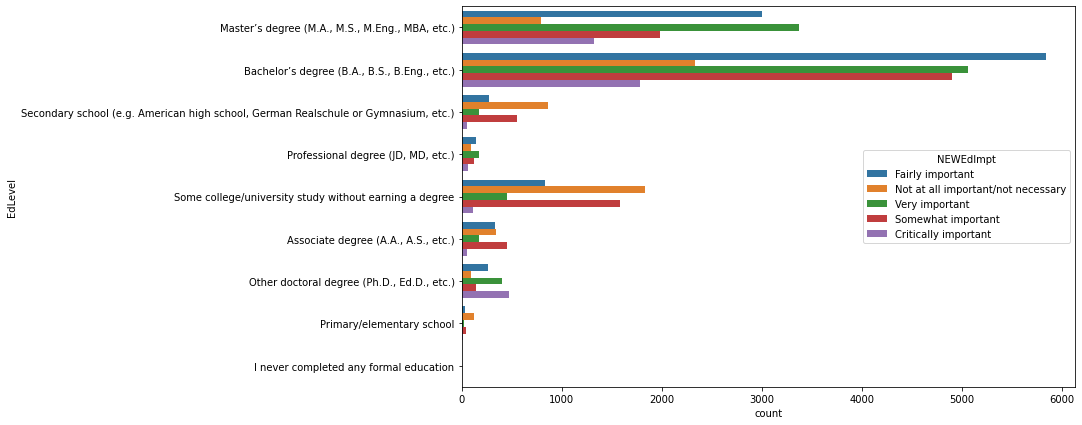

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(y=survay_results_df['EdLevel'],hue=survay_results_df['NEWEdImpt'])
plt.show()

Вывод: Данная работа акцентировала внимание на анализе данных, которые поступают на обучение. Необходимо было закрепить навыки по изучению выборки. В целом, датасет, который был дан на рассмотрение, очень массивный и его можно и дальше рассматривать и анализировать взаимосвязи. Очень хорошо это рассмотрено на самом сайте Stack Overflow, где они также дают подробный отчет за каждый год, сравнивая их. Я рассмотрела не все данные, а лишь те, которые посчитала основными.

Спасибо за проверку домашнего задания 🍀